In [2]:
import sys
sys.path.append('..')

import numpy as np
from misso import MISSO
import matplotlib.pyplot as plt
# from sklearn.covariance import GraphicalLasso

plt.style.use('seaborn')

In [3]:
# Create Data
M = 200
t = np.random.uniform(-10, 10, (M, 1))

y1 = np.sin(t/10 * np.pi)

y2 = np.cos(t / 10 * np.pi)

y3 = np.random.uniform(-1, 1, (M, 1))

y4 = -np.sin(t/10 * np.pi)

y5 = np.cos(t / 10 * np.pi - 2 * np.pi / 3.)

X = np.hstack([y1, y2, y3, y4, y5])

X.shape

(200, 5)

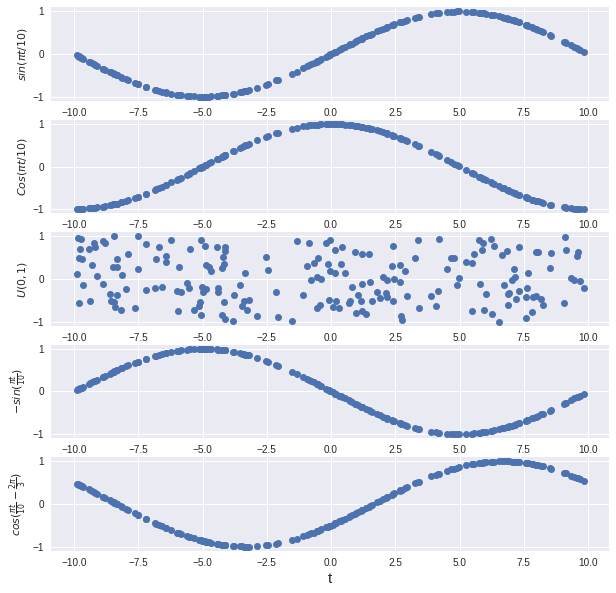

In [4]:
# Show the input data

labels = [r'$sin(\pi t/10)$',
          r'$Cos(\pi t/10)$',
          r'$U(0,1)$',
          r'$-sin(\frac{\pi t}{10})$',
          r'$cos(\frac{\pi t}{10} - \frac{2\pi}{3})$']

fig,  (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 10))
ax1.plot(t, y1, marker='o', ls='None')
ax1.set_xlabel('t', fontsize=15)
ax1.set_ylabel(labels[0])

ax2.plot(t, y2, marker='o', ls='None')
ax2.set_xlabel('t', fontsize=15)
ax2.set_ylabel(labels[1])

ax3.plot(t, y3, marker='o', ls='None')
ax3.set_xlabel('t', fontsize=15)
ax3.set_ylabel(labels[2])

ax4.plot(t, y4, marker='o', ls='None')
ax4.set_xlabel('t', fontsize=15)
ax4.set_ylabel(labels[3])

ax5.plot(t, y5, marker='o', ls='None')
ax5.set_xlabel('t', fontsize=15)
ax5.set_ylabel(labels[4])
plt.show()

Computing MIM: 100%|██████████| 15/15 [00:00<00:00, 951.72it/s]


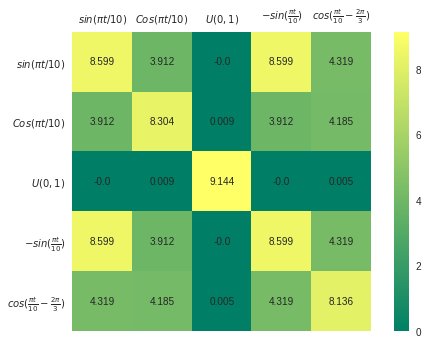

In [6]:
model = MISSO(mp=True)
mim = model.fit(X)
model.show_matrix(mim, xlabels = labels)

In [5]:
cov_ = GraphicalLasso().fit(X)
cov = np.around(cov_.covariance_, decimals=3)

/home/anand/miniconda3/envs/sqdev/lib/python3.8/site-packages/sklearn/covariance/_graph_lasso.py:226: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4245586421667298e-05, tolerance: 9.047110548375406e-06
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/home/anand/miniconda3/envs/sqdev/lib/python3.8/site-packages/sklearn/covariance/_graph_lasso.py:264: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 8.960e-04
  warnings.warn('graphical_lasso: did not converge after '


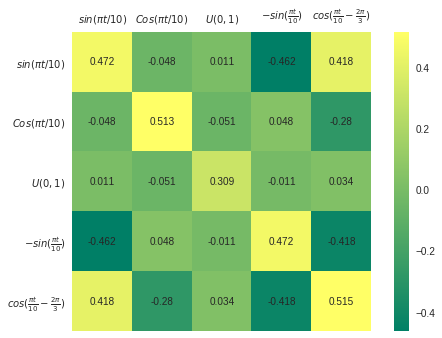

In [6]:
model.show_matrix(cov, xlabels=labels)

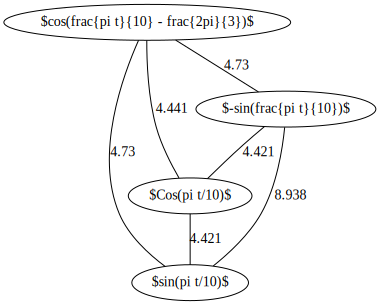

In [7]:
g = model.show_graph(mim, threshold=1.0, node_labels=labels, title='MISSO')
g

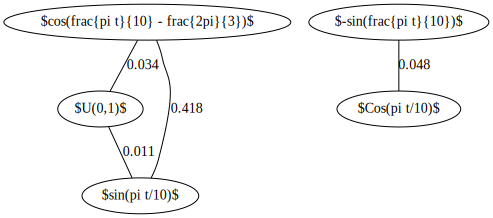

In [8]:
g = model.show_graph(cov, threshold=0.01, node_labels=labels, title='Graphical LASSO')
g